In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

2024-02-21 10:28:28.645715: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-02-21 10:28:28.645744: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
batch_size = 128  # Kích thước batch
num_classes = 10  # 10 lớp
epochs = 10    # Số epoches

In [3]:
def get_mnist(flag, one_hot = True):
    with np.load(f"./data/mnist.npz") as f:
            images, labels = f[f"x_{flag}"], f[f"y_{flag}"]
    images = images.astype("float32") / 255
    images = np.reshape(images, (images.shape[0], images.shape[1] * images.shape[2]))
    if one_hot == True:
        labels = np.eye(10)[labels]
    return images, labels

In [4]:
X_train, y_train = get_mnist("train")
X_test, y_test = get_mnist("test")
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000] # tập validation
X_train, y_train = X_train[:50000,:], y_train[:50000]



In [5]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [6]:
y_train.shape

(50000, 10)

In [7]:
weight_1 = np.random.uniform(-0.5, 0.5, (28, 784))
weight_2 = np.random.uniform(-0.5, 0.5, (10,28))
bias_1 = np.zeros((28, 1))
bias_2 = np.zeros((10, 1))

In [8]:

# # convert to one-hot encoding (binary class matrices)
# y_train = np_utils.to_categorical(y_train, num_classes)
# y_test = np_utils.to_categorical(y_test, num_classes)
# y_val = np_utils.to_categorical(y_val, num_classes)

In [9]:

model = Sequential()

# input shape
model.add(Dense(28, activation='relu', input_shape=(784,)))
# model.add(Dense(28, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 28)                21980     
                                                                 
 dense_1 (Dense)             (None, 10)                290       
                                                                 
Total params: 22,270
Trainable params: 22,270
Non-trainable params: 0
_________________________________________________________________


2024-02-21 10:28:30.421196: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-02-21 10:28:30.421236: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-02-21 10:28:30.421262: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (lovetonight): /proc/driver/nvidia/version does not exist
2024-02-21 10:28:30.421520: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [11]:
H = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1, # log or not
          validation_data=(X_val, y_val))
     

2024-02-21 10:28:30.478538: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 156800000 exceeds 10% of free system memory.


Epoch 1/10
391/391 [==============================] - 1s 1ms/step - loss: 0.5423 - accuracy: 0.8531 - val_loss: 0.2745 - val_accuracy: 0.9237
Epoch 2/10
391/391 [==============================] - 0s 1ms/step - loss: 0.2713 - accuracy: 0.9225 - val_loss: 0.2290 - val_accuracy: 0.9342
Epoch 3/10
391/391 [==============================] - 0s 1ms/step - loss: 0.2309 - accuracy: 0.9334 - val_loss: 0.2052 - val_accuracy: 0.9436
Epoch 4/10
391/391 [==============================] - 0s 1ms/step - loss: 0.2037 - accuracy: 0.9415 - val_loss: 0.1922 - val_accuracy: 0.9493
Epoch 5/10
391/391 [==============================] - 0s 1ms/step - loss: 0.1844 - accuracy: 0.9476 - val_loss: 0.1798 - val_accuracy: 0.9486
Epoch 6/10
391/391 [==============================] - 0s 1ms/step - loss: 0.1697 - accuracy: 0.9510 - val_loss: 0.1676 - val_accuracy: 0.9541
Epoch 7/10
391/391 [==============================] - 1s 1ms/step - loss: 0.1565 - accuracy: 0.9542 - val_loss: 0.1634 - val_accuracy: 0.9545
Epoch 

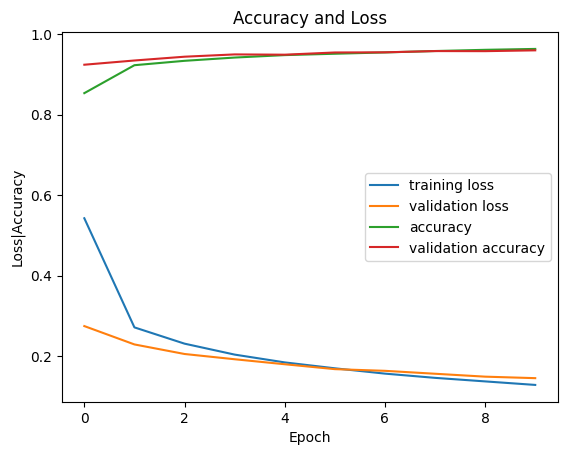

In [12]:

# 8. Vẽ đồ thị loss, accuracy của traning set và validation set
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()
     


313/313 [==============================] - 0s 470us/step
+ precision = 0.957
+ recall = 0.957
+ f1_score = 0.957


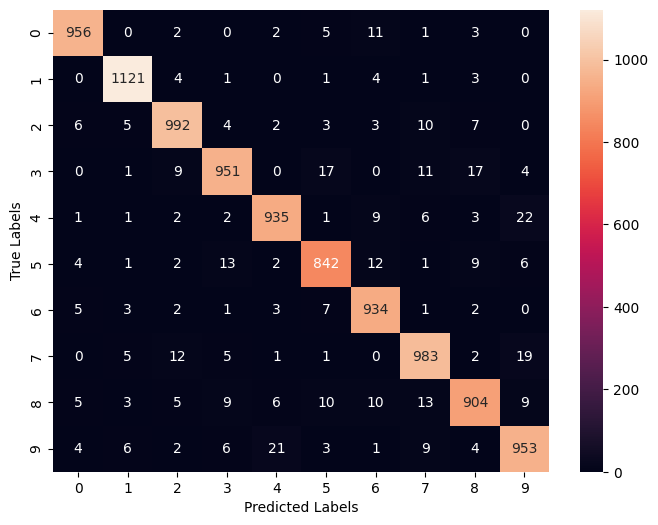

In [13]:


y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred ,axis = 1)
y_true=np.argmax(y_test,axis = 1)
a = precision_recall_fscore_support(y_true, y_pred, average='macro')
cf = confusion_matrix(y_true,y_pred)

print(f'+ precision = {a[0]:.3f}')
print(f'+ recall = {a[1]:.3f}')
print(f'+ f1_score = {a[2]:.3f}')
plt.figure(figsize = (8,6))
ax = sns.heatmap(data=cf ,fmt="d",annot = True)
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
plt.show()


Learning rate = 0.100000


2024-02-21 10:28:36.196046: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 156800000 exceeds 10% of free system memory.



Learning rate = 0.005000


2024-02-21 10:28:42.223403: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 156800000 exceeds 10% of free system memory.



Learning rate = 0.010000


2024-02-21 10:28:48.090664: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 156800000 exceeds 10% of free system memory.



Learning rate = 0.000010


2024-02-21 10:28:53.693607: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 156800000 exceeds 10% of free system memory.



Learning rate = 0.200000


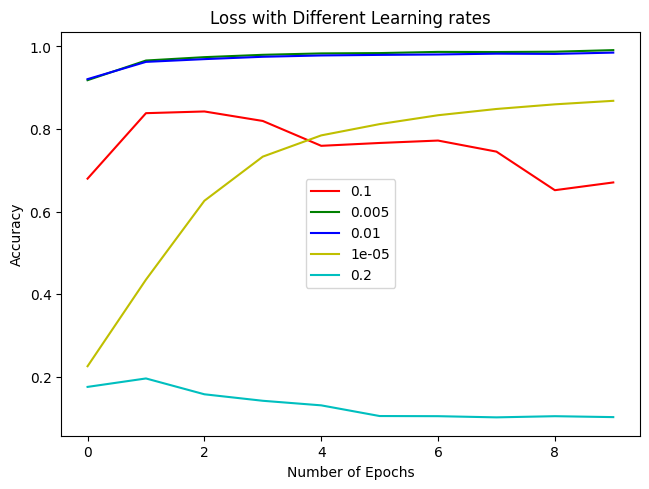

In [14]:
# Thử với các learning rate khác nhau (giữ nguyên các layer, node và activation function)
learning_rate = [0.1, 0.005, 0.01, 0.00001, 0.2]
colors = ['r', 'g', 'b', 'y', 'c']
for i, lr in enumerate(learning_rate):
  model = Sequential()
  
  model.add(Dense(128, activation='relu', input_shape=(784,)))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=lr),
                metrics=['accuracy'])
  print('\nLearning rate = %f' %(lr))
  H = model.fit(X_train, y_train,
                batch_size=batch_size,
                epochs = epochs,
                verbose=0,
                validation_data=(X_test, y_test))
  plt.plot(H.history['accuracy'], colors[i])
  
plt.title('Loss with Different Learning rates')
plt.legend(learning_rate)
plt.tight_layout()
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.show()


Activation function = sigmoid

Activation function = tanh

Activation function = relu

Activation function = softmax

Activation function = linear


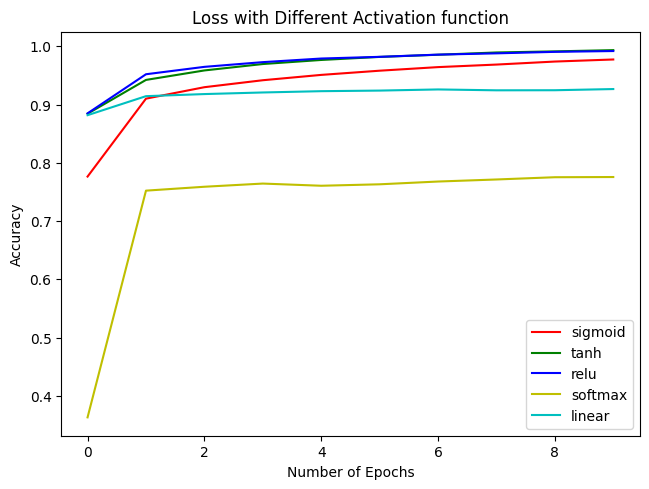

In [15]:

# Đổi activation function thành sigmoid, tanh, softmax, linear
activation_function = ['sigmoid', 'tanh', 'relu', 'softmax', 'linear']
for i, af in enumerate(activation_function):
  model = Sequential()
  
  model.add(Dense(128, activation=af, input_shape=(784,)))
  model.add(Dense(32, activation=af))
  model.add(Dense(num_classes, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=0.001),
                metrics=['accuracy'])
  print('\nActivation function = %s' %(af))
  H = model.fit(X_train, y_train,
                batch_size=batch_size,
                epochs = epochs,
                verbose=0,
                validation_data=(X_test, y_test))
  plt.plot(H.history['accuracy'], colors[i])
  
plt.title('Loss with Different Activation function')
plt.legend(activation_function)
plt.tight_layout()
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.show()